In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

import matplotlib.pyplot as plt

import os

from PIL import Image


In [2]:
# Constants
K_MEANS_THRESHOLD = 20
SUPTITLE_FONTSIZE = 26
TITLE_FONTSIZE = 18

In [3]:
# Directories
feed_dataset_dir = '../../feed-datasets' 
images_dir = '../../images/aculei-images'

In [4]:
dd = pd.read_pickle(feed_dataset_dir + '/aculei-numerical.pkl')
dd.head()

temperature  wild boar  porcupine       fox    badger    marten      wolf  \
0         25.0   0.970243   0.011796  0.011460  0.001555  0.001512  0.000991   
1         16.0   0.996869   0.002792  0.000112  0.000078  0.000033  0.000027   
2          9.0   0.084593   0.352572  0.188861  0.205791  0.131927  0.003121   
3         15.0   0.181697   0.263160  0.280894  0.010420  0.045404  0.011294   
4         19.0   0.000118   0.000149  0.942590  0.000321  0.048537  0.007341   

       deer      hare  squirrel  ...   mallard       cat         horse  \
0  0.000947  0.000824  0.000282  ...  0.000047  0.000039  3.581982e-06   
1  0.000049  0.000013  0.000010  ...  0.000002  0.000001  9.554066e-07   
2  0.002608  0.004968  0.008771  ...  0.009100  0.000600  2.867275e-05   
3  0.020466  0.067673  0.004126  ...  0.026158  0.001735  7.151766e-04   
4  0.000033  0.000437  0.000366  ...  0.000003  0.000066  9.427521e-07   

          heron  season_autumn  season_spring  season_summer  season_winter  \
0  2.118289e-06              0              0              1              0   
1  5.664022e-08              0              1              0              0   
2  6.266050e-03              0              1              0              0   
3  8.043946e-02              0              0              1              0   
4  4.238395e-06              0              0              1              0   

   day_time_day  day_time_night  
0             0               1  
1             0               1  
2             1               0  
3             1               0  
4             0               1  

[5 rows x 22 columns]

In [5]:
mean_value = dd.temperature.mean()
dd.temperature.fillna(value=mean_value, inplace=True)

In [6]:
x = dd.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dd = pd.DataFrame(x_scaled, columns=dd.columns)

In [7]:
dd.head()

temperature  wild boar  porcupine       fox    badger    marten      wolf  \
0     0.738095   0.970339   0.011797  0.011498  0.001561  0.001526  0.001119   
1     0.523810   0.996969   0.002792  0.000111  0.000077  0.000033  0.000030   
2     0.357143   0.084600   0.352599  0.189490  0.206726  0.133163  0.003526   
3     0.500000   0.181714   0.263180  0.281831  0.010466  0.045829  0.012760   
4     0.595238   0.000117   0.000149  0.945735  0.000321  0.048991  0.008293   

       deer      hare  squirrel  ...   mallard       cat         horse  \
0  0.000951  0.000833  0.000314  ...  0.000048  0.000060  3.580889e-06   
1  0.000049  0.000013  0.000010  ...  0.000002  0.000002  9.405302e-07   
2  0.002619  0.005028  0.009804  ...  0.009194  0.000923  2.880332e-05   
3  0.020556  0.068491  0.004612  ...  0.026428  0.002669  7.189096e-04   
4  0.000033  0.000442  0.000409  ...  0.000003  0.000101  9.278094e-07   

          heron  season_autumn  season_spring  season_summer  season_winter  \
0  2.117858e-06            0.0            0.0            1.0            0.0   
1  5.513962e-08            0.0            1.0            0.0            0.0   
2  6.269298e-03            0.0            1.0            0.0            0.0   
3  8.048117e-02            0.0            0.0            1.0            0.0   
4  4.239064e-06            0.0            0.0            1.0            0.0   

   day_time_day  day_time_night  
0           0.0             1.0  
1           0.0             1.0  
2           1.0             0.0  
3           1.0             0.0  
4           0.0             1.0  

[5 rows x 22 columns]

In [9]:
dd.drop(columns=['temperature', 'season_autumn', 'season_spring', 'season_summer',
       'season_winter', 'day_time_day', 'day_time_night'], inplace=True)

Explained Variance Ratio: [1.73707212e-01 1.01130577e-01 8.92753587e-02 7.62487655e-02
 7.30281036e-02 6.94588614e-02 6.61627371e-02 6.24564228e-02
 5.98183606e-02 5.74425678e-02 5.32889417e-02 4.62738455e-02
 3.83033083e-02 3.34049379e-02 1.29597984e-15]


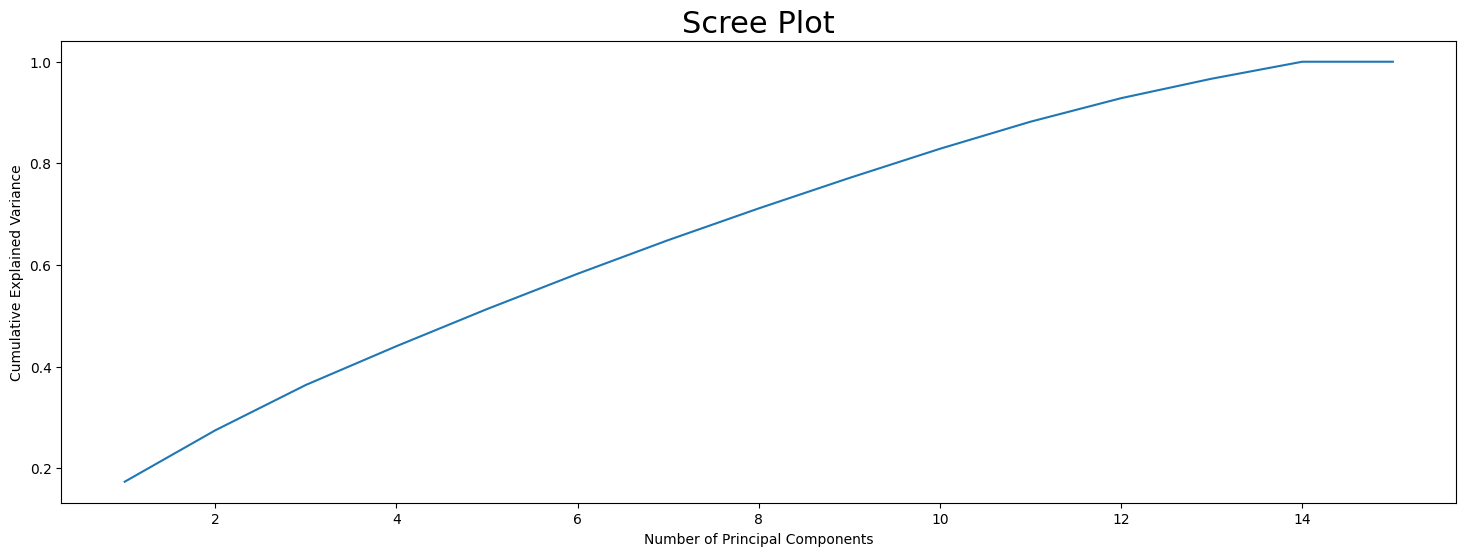

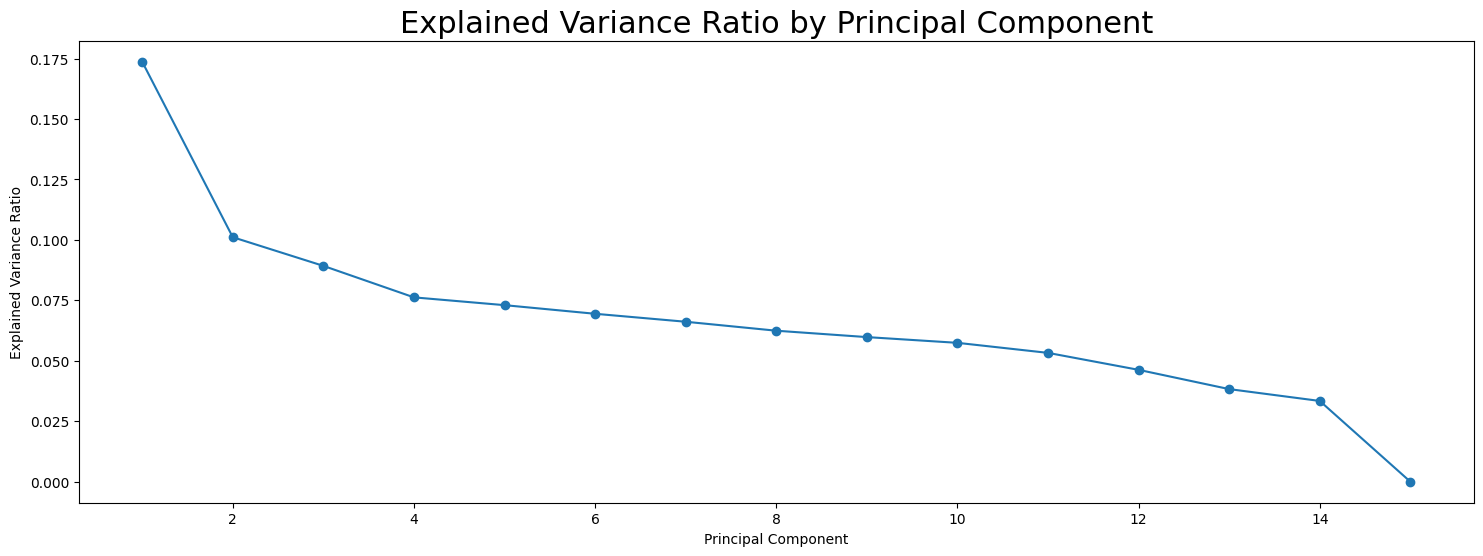

Principal Components:
[[-0.54306259  0.10616953  0.398701    0.07037114  0.25422563  0.3247874
   0.19899159  0.26280469  0.28014122  0.21168515  0.26065222  0.05998665
   0.22807579  0.03904833  0.05238289]
 [ 0.28136413 -0.26556454 -0.11579288 -0.25017879 -0.2980341   0.35195553
   0.04701591 -0.17001187 -0.03878435  0.07968089  0.53478628 -0.14229611
   0.45132942  0.10378759 -0.04396378]
 [ 0.02134097  0.28416717 -0.10352582  0.46993713  0.41989431  0.03274087
  -0.35641592 -0.42112614  0.02010996 -0.1163208   0.17981229 -0.2725733
   0.23072192 -0.02827333 -0.17571785]
 [-0.1414437  -0.10893377 -0.15314164  0.2156669   0.00563852 -0.06494091
  -0.21509767 -0.12182056 -0.23438797 -0.01984309  0.13989142  0.58161978
   0.15340028  0.18057956  0.60289544]
 [ 0.20995523  0.0458309   0.18146396 -0.15970983  0.04004713 -0.02062332
  -0.36008352  0.14171223  0.07379054  0.11199402  0.06190394  0.15389084
   0.14879622 -0.81133809  0.1330351 ]
 [-0.12834302  0.77857884 -0.16939379 -0.3834

wild boar  porcupine       fox    badger    marten      wolf      deer  \
0  -0.543063   0.106170  0.398701  0.070371  0.254226  0.324787  0.198992   
1   0.281364  -0.265565 -0.115793 -0.250179 -0.298034  0.351956  0.047016   
2   0.021341   0.284167 -0.103526  0.469937  0.419894  0.032741 -0.356416   
3  -0.141444  -0.108934 -0.153142  0.215667  0.005639 -0.064941 -0.215098   
4   0.209955   0.045831  0.181464 -0.159710  0.040047 -0.020623 -0.360084   
5  -0.128343   0.778579 -0.169394 -0.383469 -0.271544  0.010223 -0.081805   
6   0.107729  -0.260131 -0.255168  0.078938  0.159416 -0.127672  0.047100   
7  -0.050417   0.165084 -0.365424  0.337986 -0.122384 -0.094082  0.675122   
8   0.039655   0.044949 -0.314193 -0.111987  0.078305 -0.339298 -0.002795   
9  -0.012579   0.096852 -0.037295  0.277785 -0.195885  0.165454 -0.083706   

       hare  squirrel   buzzard       dog   mallard       cat     horse  \
0  0.262805  0.280141  0.211685  0.260652  0.059987  0.228076  0.039048   
1 -0.170012 -0.038784  0.079681  0.534786 -0.142296  0.451329  0.103788   
2 -0.421126  0.020110 -0.116321  0.179812 -0.272573  0.230722 -0.028273   
3 -0.121821 -0.234388 -0.019843  0.139891  0.581620  0.153400  0.180580   
4  0.141712  0.073791  0.111994  0.061904  0.153891  0.148796 -0.811338   
5 -0.167047  0.081997  0.162244  0.006843 -0.063814 -0.009856  0.093877   
6 -0.141800  0.437117  0.635441 -0.101209 -0.246427 -0.099059  0.015109   
7  0.015503 -0.087027 -0.097552  0.131560 -0.021461  0.106131 -0.432914   
8  0.095931  0.463876 -0.007473  0.064604  0.496765  0.263604  0.109092   
9  0.016449 -0.393492  0.649523  0.006559  0.244709 -0.147602 -0.030418   

      heron  
0  0.052383  
1 -0.043964  
2 -0.175718  
3  0.602895  
4  0.133035  
5  0.216996  
6  0.330875  
7  0.095079  
8 -0.455093  
9 -0.423709

In [10]:
scaler = StandardScaler()

# Extract features
features = dd.copy()

# Standardize the features
features_standardized = scaler.fit_transform(features)

# Perform pca analyzing all features
pca = PCA(n_components=features.shape[1])
principal_components = pca.fit_transform(features_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Scree Plot
plt.figure(figsize=(18, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio))
plt.title('Scree Plot', fontsize=22)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Plotting the explained variance ratio
plt.figure(figsize=(18, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by Principal Component', fontsize=22)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Individual components contributions
components = pca.components_
print("Principal Components:")
print(components)

# Set a threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that meet the threshold
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= threshold) + 1

print(f"Number of components to retain for {threshold * 100}% cumulative explained variance: {num_components}")

# Then use this number when applying PCA
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(features_standardized)

loadings = pca.components_

# Display the loadings in a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, columns=dd.columns)

# Show the loadings for the first few principal components
print("Loadings for the first few principal components:")
loadings_df.head(10)

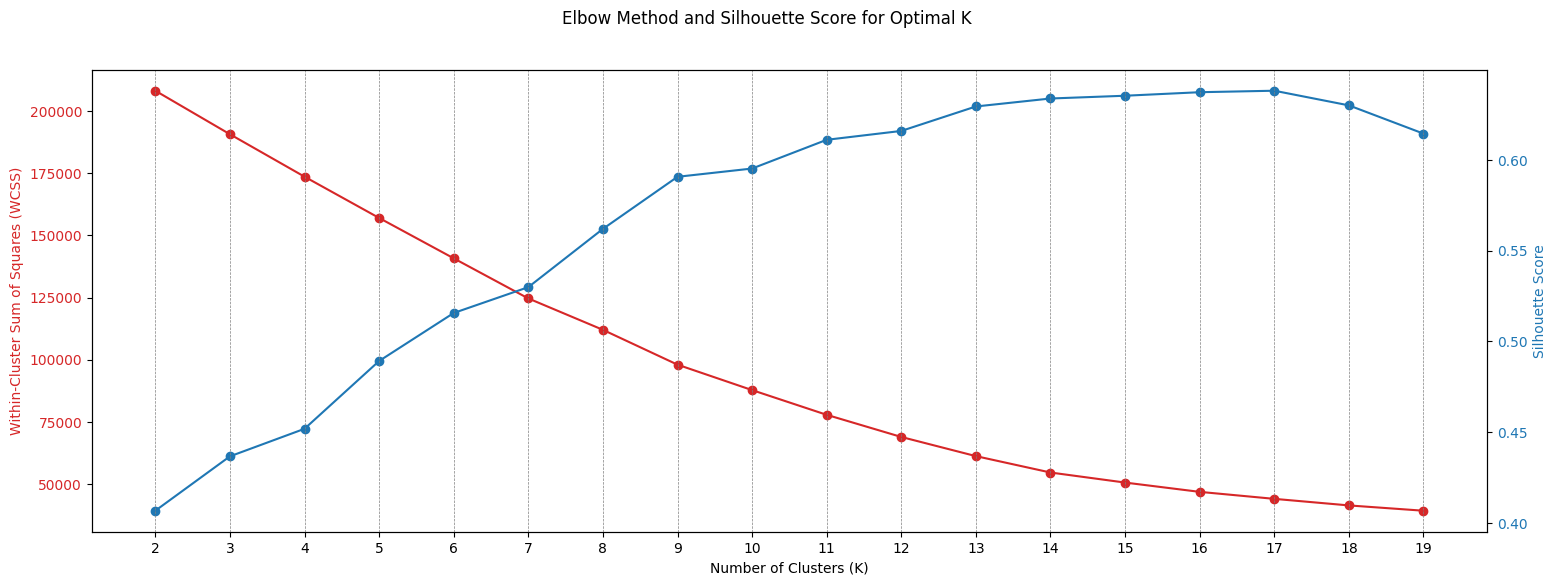

In [11]:
# Calculate the within-cluster sum of squares (WCSS) for different values of K
wcss = []
silhouette_scores = []

for k in range(2, K_MEANS_THRESHOLD):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_components)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(principal_components, cluster_labels))

# Plotting both Elbow Method and Silhouette Score
fig, ax1 = plt.subplots(figsize=(18, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color=color)
ax1.plot(range(2, K_MEANS_THRESHOLD), wcss, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, K_MEANS_THRESHOLD), silhouette_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(range(2, K_MEANS_THRESHOLD))

for i, k in enumerate(range(2, K_MEANS_THRESHOLD)):
    plt.axvline(x=k, linestyle='--', color='gray', linewidth=0.5)

fig.suptitle('Elbow Method and Silhouette Score for Optimal K')
plt.show()


In [12]:
K = 17
model = KMeans(n_clusters=K, random_state=42)

# fitting data
model.fit(principal_components)

# predictions
cluster_labels_pca = model.predict(principal_components)

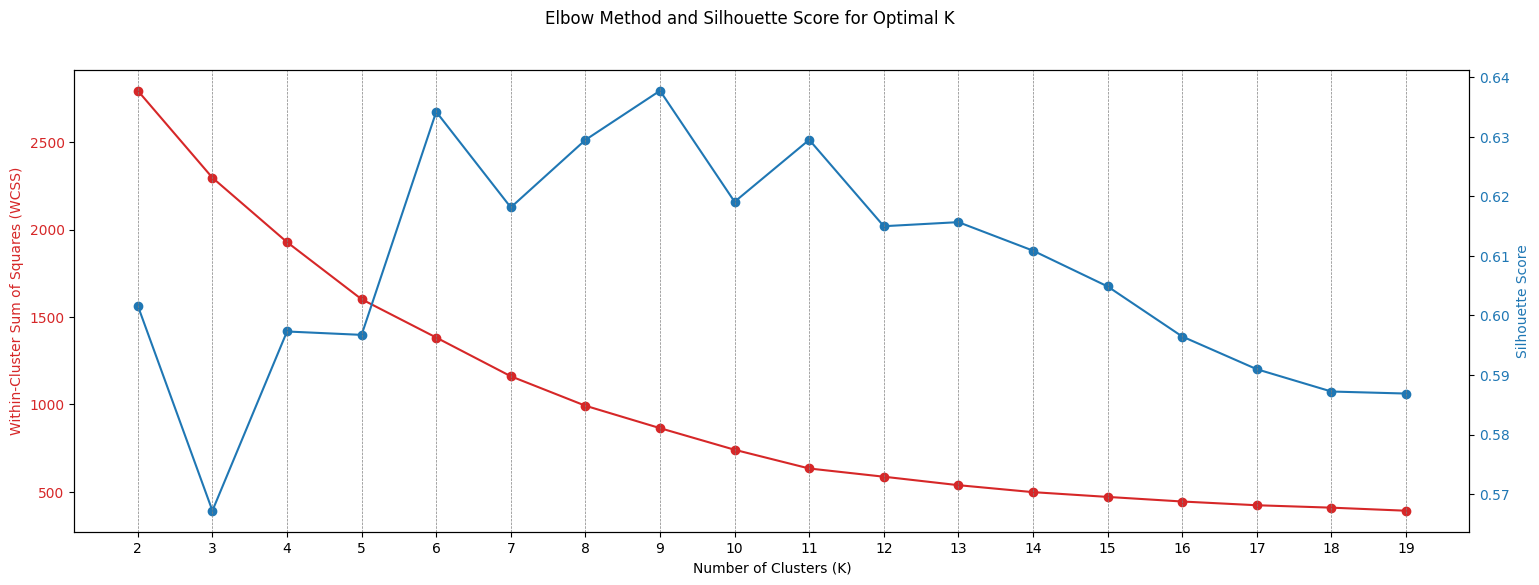

In [13]:
# Calculate the within-cluster sum of squares (WCSS) for different values of K
wcss = []
silhouette_scores = []

for k in range(2, K_MEANS_THRESHOLD):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dd)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(dd, cluster_labels))

# Plotting both Elbow Method and Silhouette Score
fig, ax1 = plt.subplots(figsize=(18, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color=color)
ax1.plot(range(2, K_MEANS_THRESHOLD), wcss, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, K_MEANS_THRESHOLD), silhouette_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(range(2, K_MEANS_THRESHOLD))

for i, k in enumerate(range(2, K_MEANS_THRESHOLD)):
    plt.axvline(x=k, linestyle='--', color='gray', linewidth=0.5)

fig.suptitle('Elbow Method and Silhouette Score for Optimal K')
plt.show()

In [14]:
K = 9
model = KMeans(n_clusters=K, random_state=42)

# fitting data
model.fit(dd)

# predictions
cluster_labels = model.predict(dd)

# adding the results to the df cluster
dd['cluster'] = cluster_labels

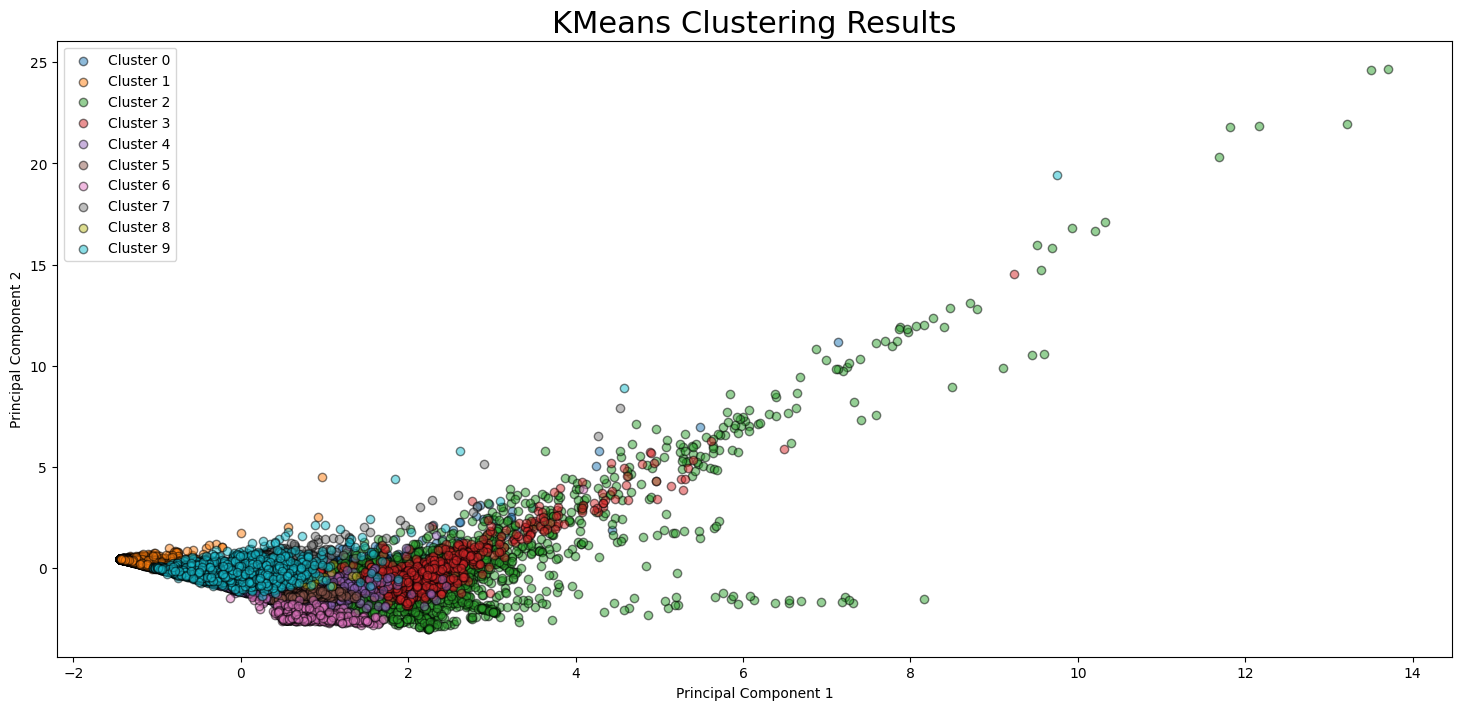

In [15]:
features = dd.drop(columns=['cluster'])

# Perform PCA to reduce dimensionality to 2 components
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)

# Add the 'cluster' column to the reduced DataFrame
reduced_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
reduced_df['cluster'] = cluster_labels

# Plotting the results
plt.figure(figsize=(18, 8))
for cluster in range(K):
    cluster_points = reduced_df[reduced_df['cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}', ec='black', alpha=0.5)

plt.title('KMeans Clustering Results', fontsize=22)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

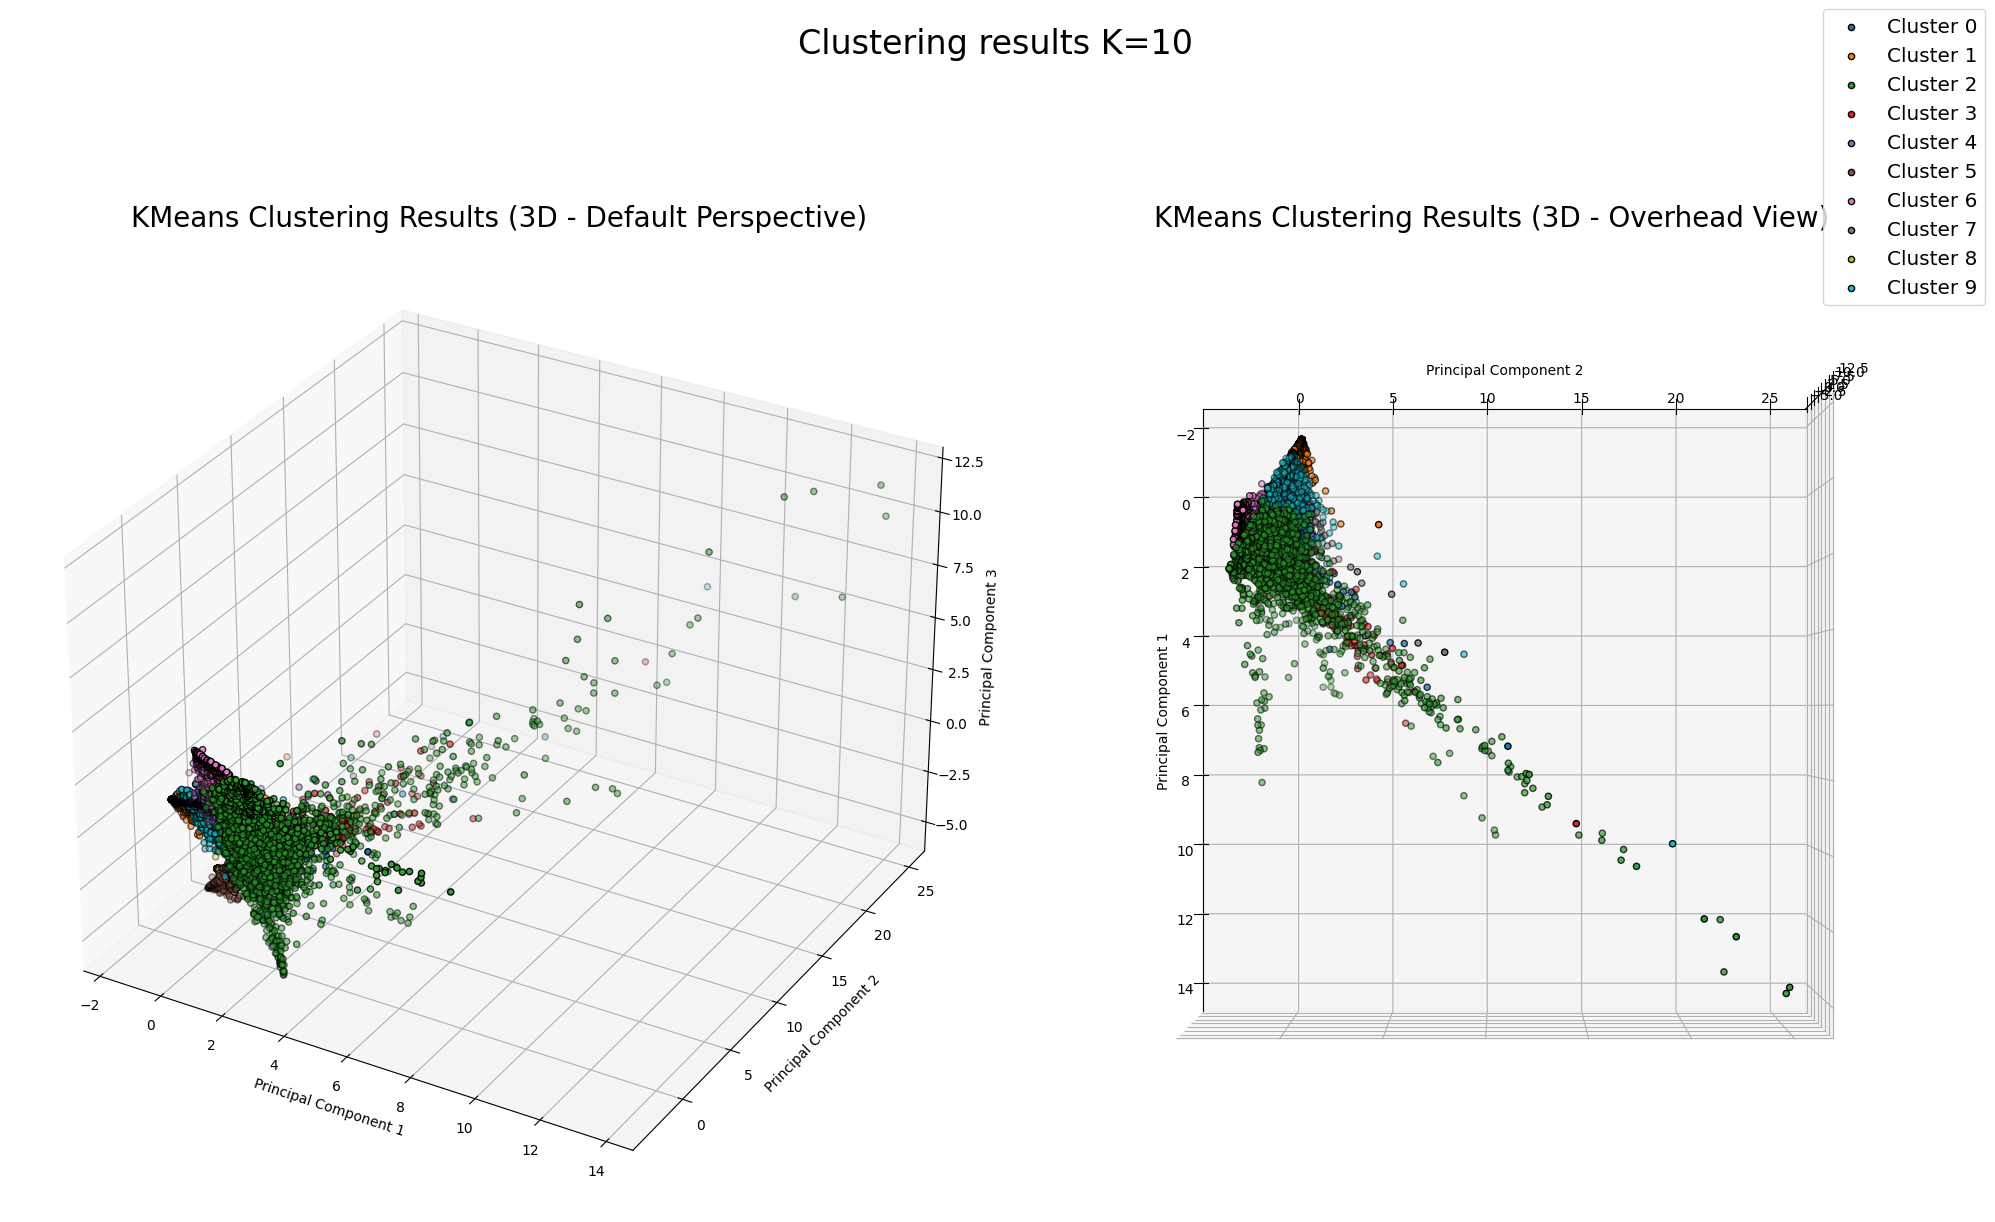

In [16]:
features = dd.drop(columns=['cluster'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 4)])

# Add the 'cluster' column to the reduced DataFrame
pc_df['cluster'] = cluster_labels

# Plotting the results in 3D with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 14), subplot_kw={'projection': '3d'})

# Plot 1 - Default Perspective
ax1 = axes[0]
for cluster in range(K):
    cluster_points = pc_df[pc_df['cluster'] == cluster]
    ax1.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster}', ec='black')

ax1.set_title('KMeans Clustering Results (3D - Default Perspective)', fontsize=20)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# Plot 2 - Overhead Perspective
ax2 = axes[1]
for cluster in range(K):
    cluster_points = pc_df[pc_df['cluster'] == cluster]
    ax2.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster}', ec='black')

ax2.set_title('KMeans Clustering Results (3D - Overhead View)', fontsize=20)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
#ax2.set_zlabel('Principal Component 3')

# Set the view to an overhead perspective for the second plot
ax2.view_init(elev=90, azim=0)

# Increase the legend fontsize
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize='x-large')

fig.suptitle(f"Clustering results K={K}", fontsize=24)
plt.tight_layout()
plt.show()

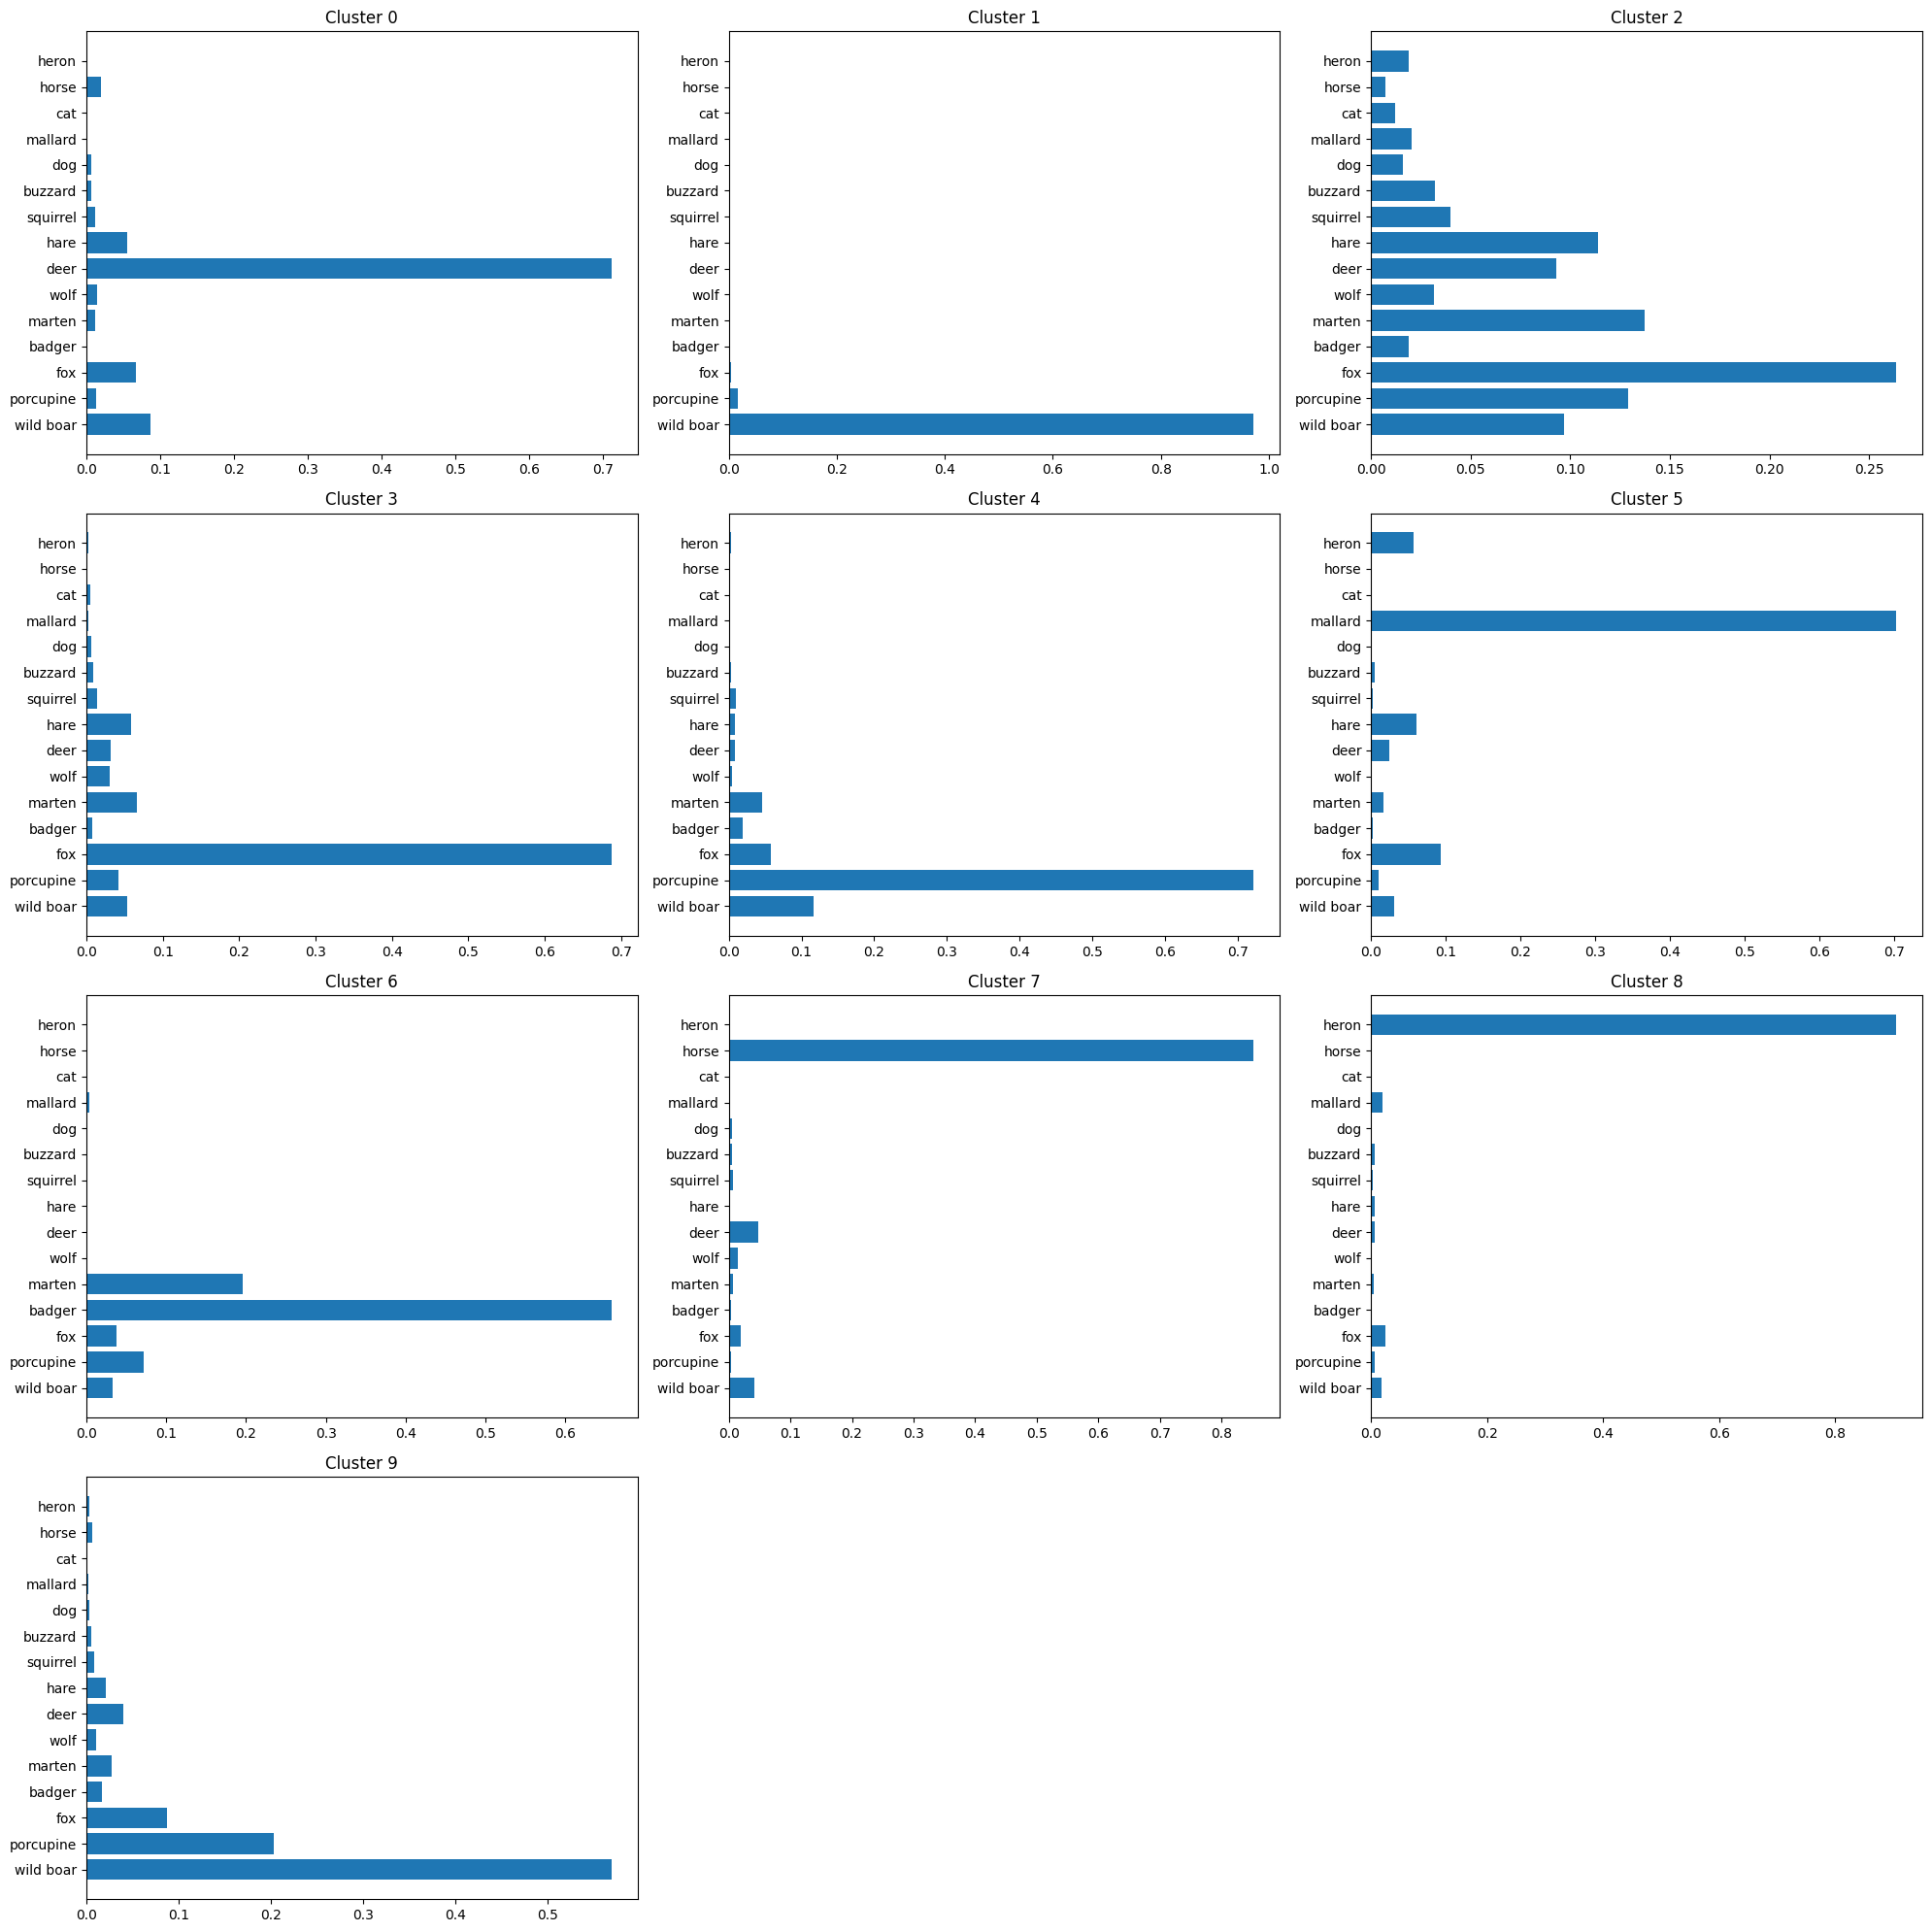

In [17]:
centroids = model.cluster_centers_

# Create a DataFrame with centroids and feature names
centroid_df = pd.DataFrame(data=centroids, columns=features.columns)

# Visualize feature importance
num_clusters = model.n_clusters
rows = 4
cols = int(np.ceil(num_clusters / rows))

plt.figure(figsize=(20, 20))
for i in range(num_clusters):
    plt.subplot(rows, cols, i + 1)
    plt.barh(features.columns, centroid_df.iloc[i, :])
    plt.title(f'Cluster {i}')
    plt.tight_layout()

plt.show()


In [18]:
df = pd.read_csv(feed_dataset_dir + '/aculei.csv')

In [19]:
df['cluster'] = cluster_labels

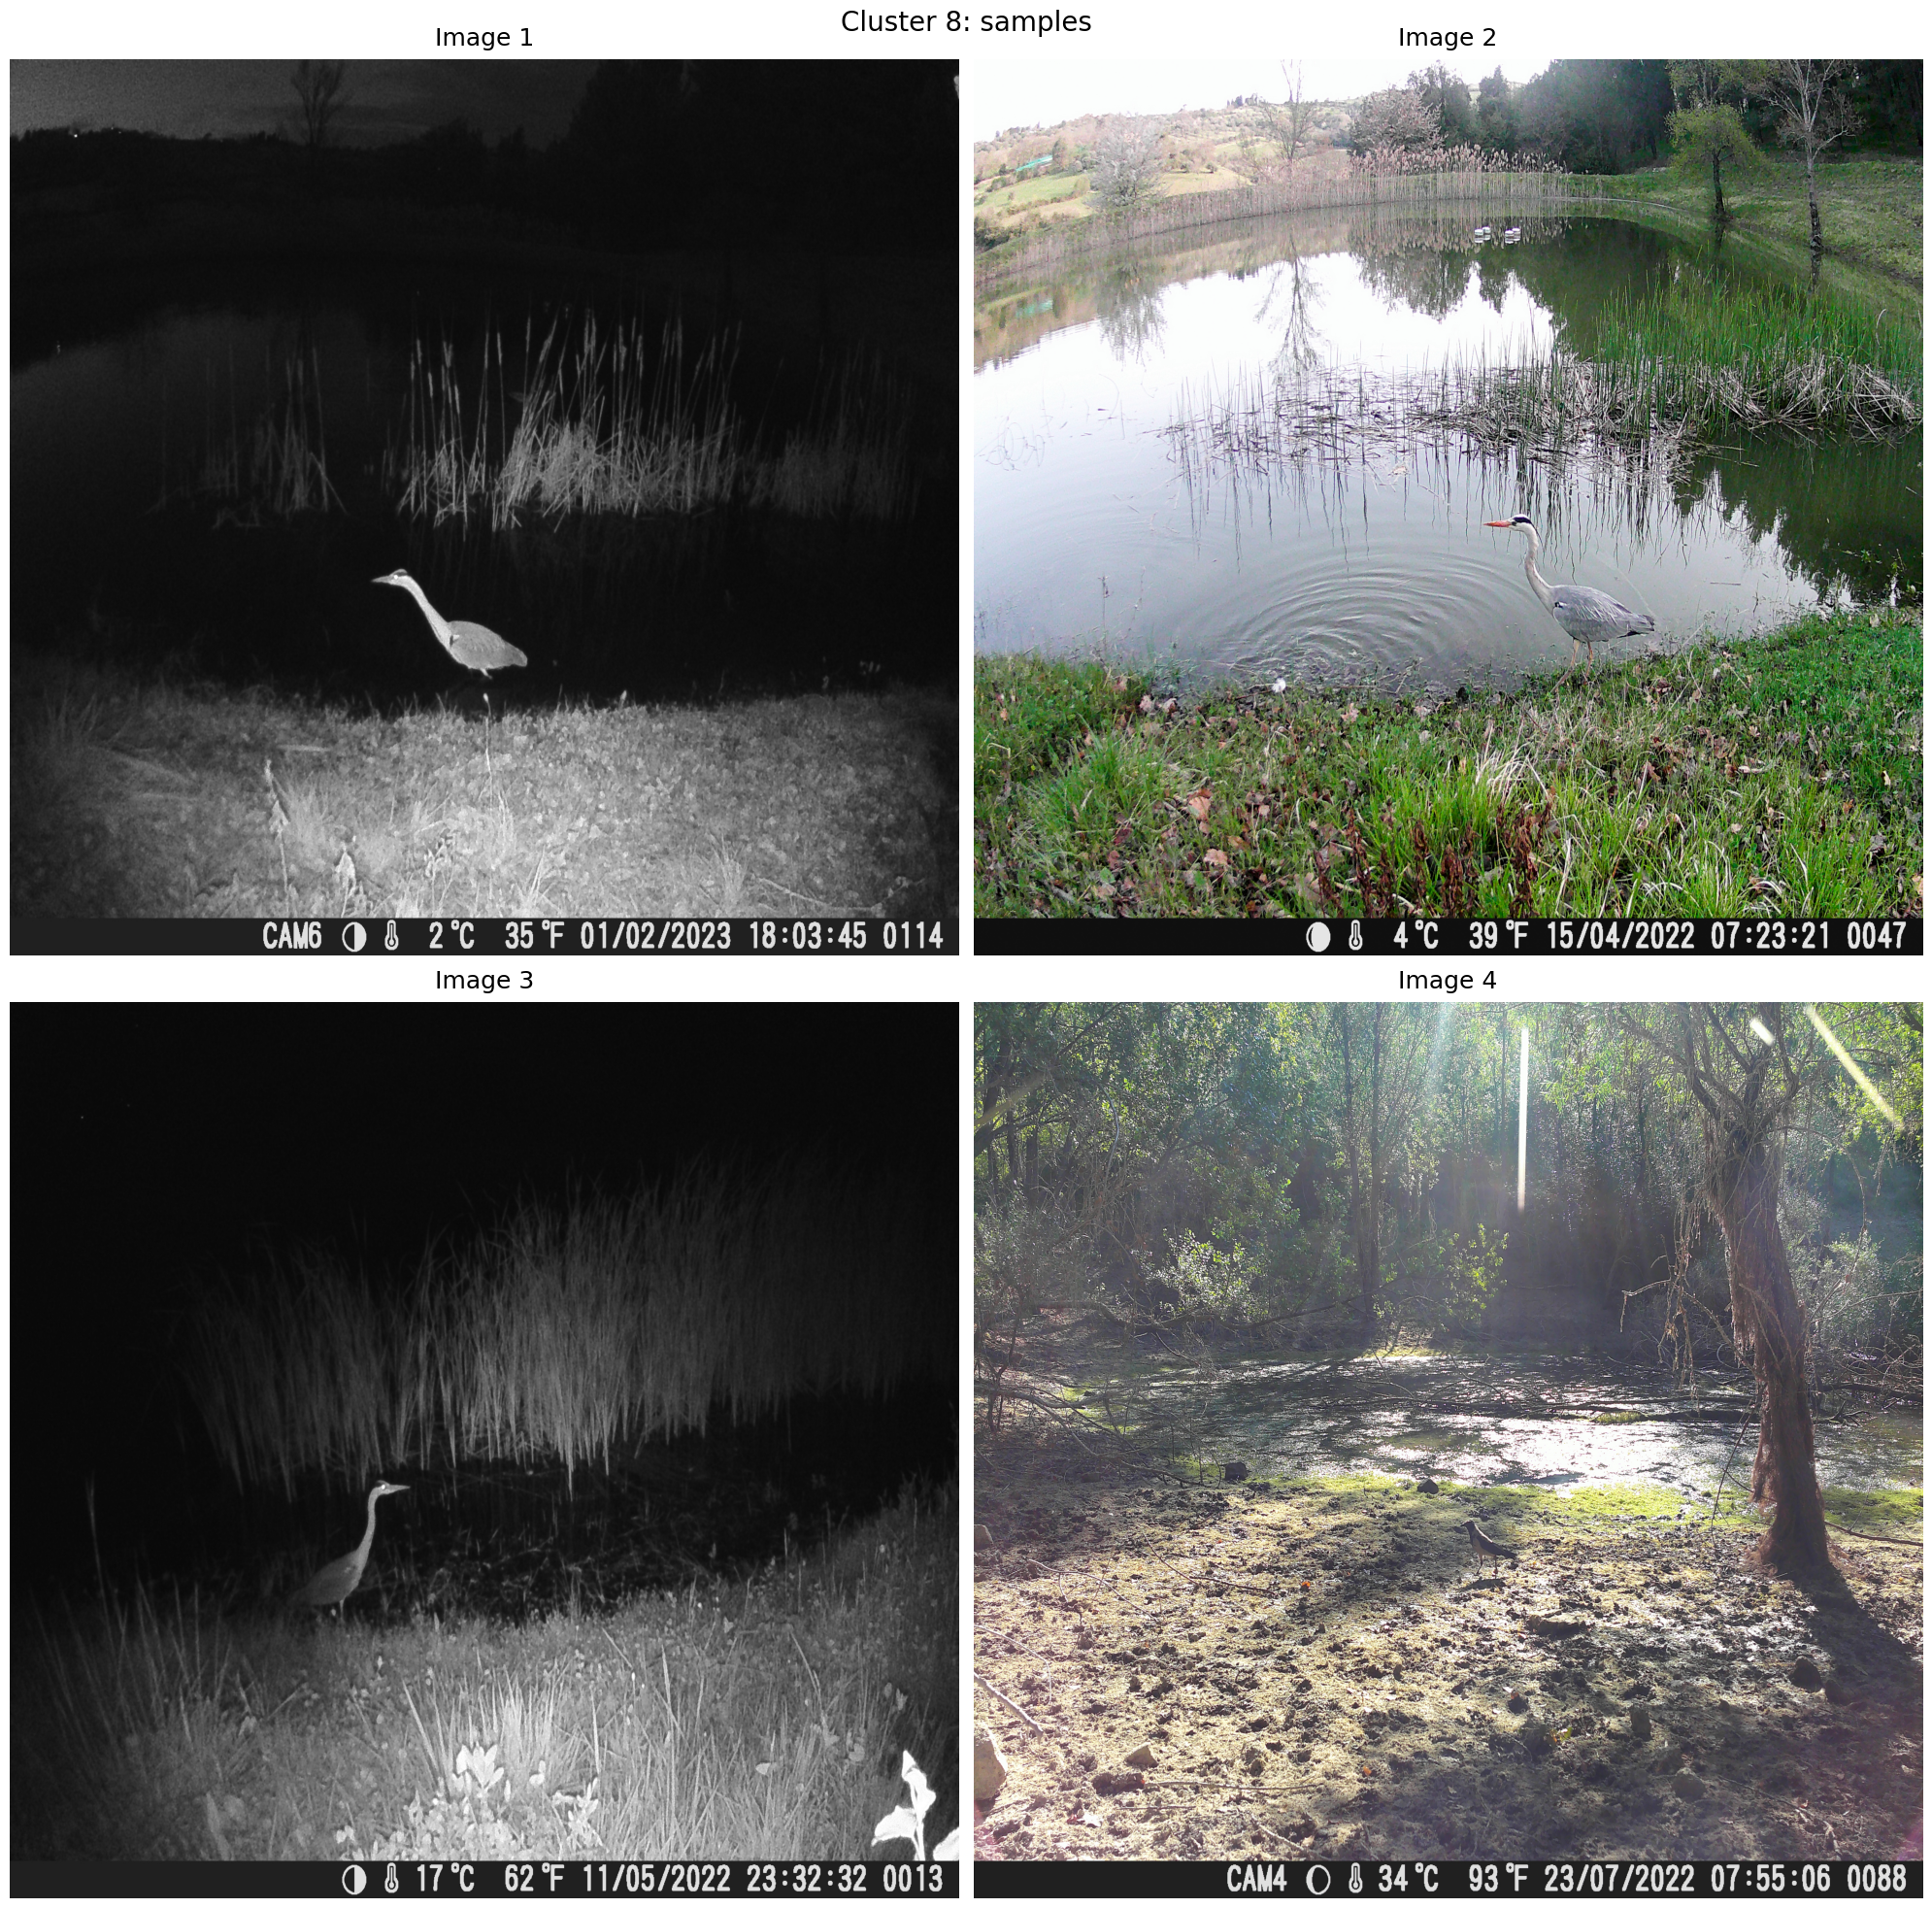

In [27]:
def plot_images_for_cluster(df, cluster, num_images=4):
    cluster_images = df[df['cluster'] == cluster]['image_name'].sample(num_images)

    fig, axes = plt.subplots(2, 2, figsize=(20, 20))

    for i, ax in enumerate(axes.flatten()):
        if i < num_images:
            image_name = cluster_images.iloc[i]
            image_path = os.path.join(images_dir, image_name)
            image = Image.open(image_path)

            ax.imshow(image, aspect='auto')
            ax.axis('off')
            ax.set_title(f"Image {i + 1}", fontsize=18, pad=10)

    fig.suptitle(f"Cluster {cluster}: samples", fontsize=20)
    plt.tight_layout()
    plt.show()

plot_images_for_cluster(df, cluster=8, num_images=4)